# Quantum tomography arbitrary-checker

Check for the hidden state is random or not?

<img src='../../images/binho_checkstate.png' width = 500px/>

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit, qtm.encoding

$U_{target}$ circuit that generates a random state based on [this paper](https://arxiv.org/abs/2008.01511). For a random N-dimensional state (with real entries), it takes $\log_{2}{N}$ qubits.

Here's the circuit generate 3-qubit state:

<img src='../../images/arbitrary_circuit.png'/>

Here's the fully circuit in this notebook, the barrier splits $U_{gen}$ and $U_{target}$:

<img src='../../images/check_arbitrary_state.png'/>

In [2]:
psi = 2*np.random.rand(8)-1
psi = psi / np.linalg.norm(psi)
encode  = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encode.qcircuit
qc.add_register(qiskit.ClassicalRegister(int(np.log2(psi.shape[0]))))
for i in range(0, qc.num_qubits):
    qc.measure(i, i)
counts = qiskit.execute(qc, backend = qtm.constant.backend, shots = qtm.constant.num_shots).result().get_counts()
print("Generate state: ", np.array(list(counts.values()))/qtm.constant.num_shots)
print("Expectation state: ", psi**2)

Generate state:  [0.20605469 0.04492188 0.02050781 0.18847656 0.21484375 0.06640625
 0.07714844 0.18164062]
Expectation state:  [0.21019581 0.05481703 0.01428232 0.17219711 0.21070105 0.05956588
 0.07842464 0.19981616]


In [3]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*num_layers*5)
# For determine random state
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_arbitrarychecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 150/150 [20:53<00:00,  8.36s/it]


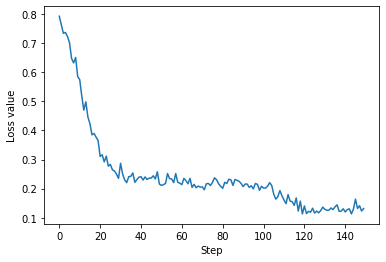

In [4]:
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [6]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
thetas = np.zeros([num_qubits*num_layers*5])
# For determine random state
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_arbitrarychecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers,
    encoder = encoder
)


Step: 100%|██████████| 150/150 [24:43<00:00,  9.89s/it]


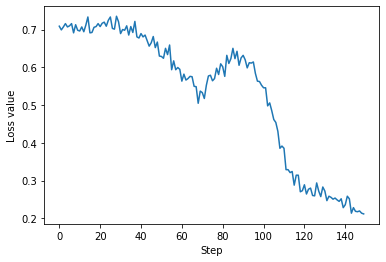

In [7]:
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [8]:
# Get |psi> = U_gen|000...>
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, thetas, num_layers = num_layers)
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
# Get |psi~> = U_target|000...>
qc1 = encoder.qcircuit
psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.4644348513437649
Fidelity:  (0.7843002698074465+3.8212226785572234e-11j)


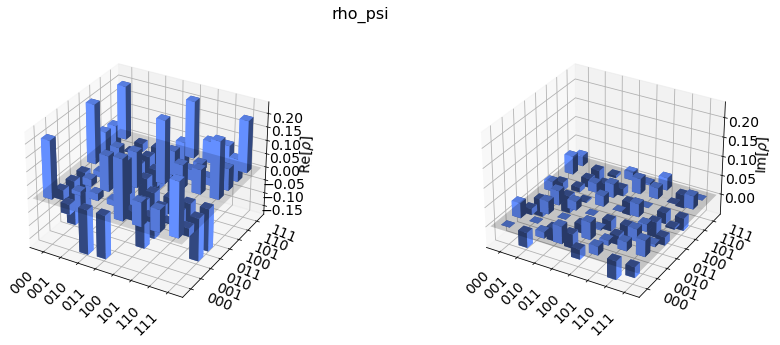

In [30]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

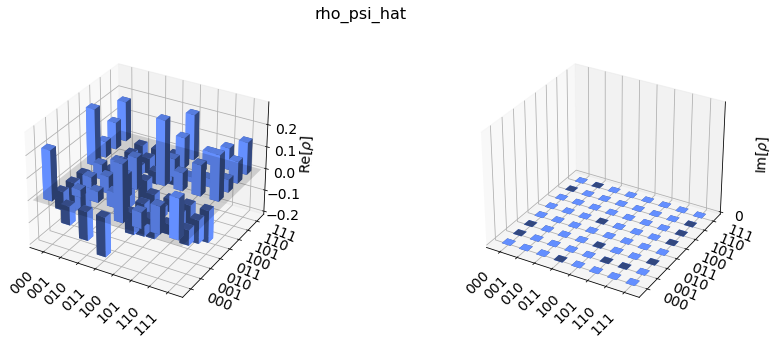

In [31]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')